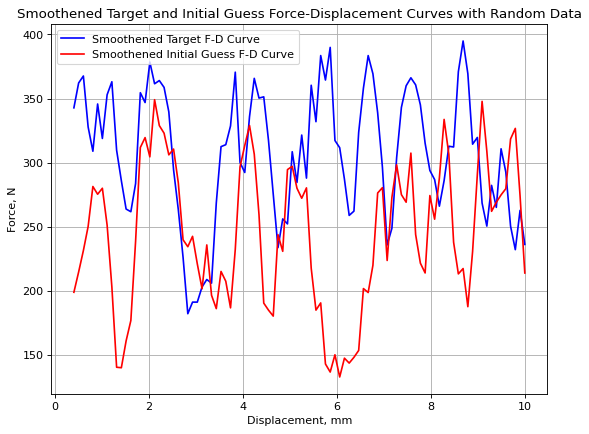

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for the target F-D curve
num_points = 100
displacement = np.linspace(0, 10, num_points)
target_force = np.random.uniform(100, 500, num_points)

# Generate random data for the initial guess F-D curve
initial_guess_force = np.random.uniform(50, 450, num_points)

# Define a moving average window size for smoothing
window_size = 5

# Apply a moving average to smoothen the curves
def moving_average(data, window_size):
    cumsum = np.cumsum(data)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    smoothed_data = cumsum[window_size - 1:] / window_size
    return smoothed_data

smoothed_target_force = moving_average(target_force, window_size)
smoothed_initial_guess_force = moving_average(initial_guess_force, window_size)

# Plot the smoothened target and initial guess F-D curves
plt.figure(figsize=(8, 6), dpi=80)
plt.title("Smoothened Target and Initial Guess Force-Displacement Curves with Random Data")
plt.xlabel("Displacement, mm")
plt.ylabel("Force, N")

plt.plot(displacement[window_size - 1:], smoothed_target_force, label="Smoothened Target F-D Curve", color="blue")
plt.plot(displacement[window_size - 1:], smoothed_initial_guess_force, label="Smoothened Initial Guess F-D Curve", color="red")

plt.legend()
plt.grid(True)
plt.show()


Epoch 1/100
3/3 [==============================] - 0s 2ms/step - loss: 72858.0859
Epoch 2/100
3/3 [==============================] - 0s 865us/step - loss: 57195.3438
Epoch 3/100
3/3 [==============================] - 0s 799us/step - loss: 44545.2070
Epoch 4/100
3/3 [==============================] - 0s 1ms/step - loss: 34863.7461
Epoch 5/100
3/3 [==============================] - 0s 1ms/step - loss: 27260.5723
Epoch 6/100
3/3 [==============================] - 0s 1ms/step - loss: 21529.0566
Epoch 7/100
3/3 [==============================] - 0s 921us/step - loss: 17632.0059
Epoch 8/100
3/3 [==============================] - 0s 1ms/step - loss: 15026.9346
Epoch 9/100
3/3 [==============================] - 0s 1ms/step - loss: 13663.1445
Epoch 10/100
3/3 [==============================] - 0s 1ms/step - loss: 13167.7998
Epoch 11/100
3/3 [==============================] - 0s 6ms/step - loss: 13488.7100
Epoch 12/100
3/3 [==============================] - 0s 8ms/step - loss: 13768.5459
Epoch 1

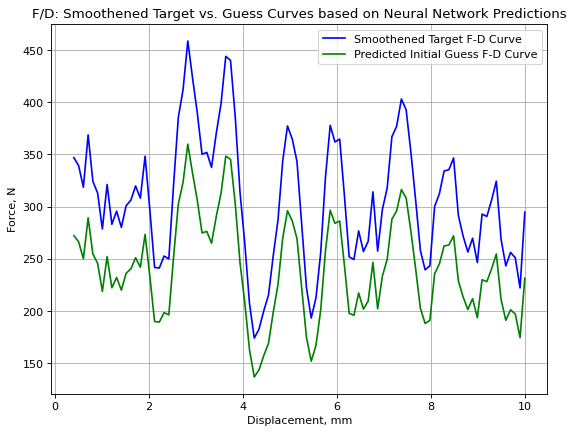

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Generate random data for the target F-D curve
num_points = 100
displacement = np.linspace(0, 10, num_points)
target_force = np.random.uniform(100, 500, num_points)

# Define a moving average window size for smoothing
window_size = 5

initial_guess_force = np.random.uniform(50, 450, num_points)

# Apply a moving average to smoothen the target curve
def moving_average(data, window_size):
    cumsum = np.cumsum(data)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    smoothed_data = cumsum[window_size - 1:] / window_size
    return smoothed_data

smoothed_target_force = moving_average(target_force, window_size)

# Define a neural network for approximating the initial guess curve
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the neural network using the smoothed target curve as input and random data as output
model.fit(smoothed_target_force, initial_guess_force[window_size - 1:], epochs=100)

# Use the trained neural network to predict the initial guess curve
initial_guess_pred = model.predict(smoothed_target_force)

# Plot the smoothened target and predicted initial guess F-D curves
plt.figure(figsize=(8, 6), dpi=80)
plt.title("F/D: Smoothened Target vs. Guess Curves based on Neural Network Predictions")
plt.xlabel("Displacement, mm")
plt.ylabel("Force, N")

plt.plot(displacement[window_size - 1:], smoothed_target_force, label="Smoothened Target F-D Curve", color="blue")
plt.plot(displacement[window_size - 1:], initial_guess_pred, label="Predicted Initial Guess F-D Curve", color="green")

plt.legend()
plt.grid(True)
plt.show()
